In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class Perceptron:
    def __init__(self, eta=0.01, epochs=50, random_state=3):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.weight_ = rgen.normal(loc=0.0, scale=0.01,
                                size=X.shape[1])
        
        self.bias_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.epochs):#this is where we start to loop throught the epochs
            errors = 0
            for xi, target in zip(X, y): 
                update = self.epochs * (target - self.predict(xi))
                self.weight_ += update * xi
                self.bias_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # calculate the net input
        return np.dot(X, self.weight_) + self.bias_

    def predict(self, X):
        """Return class label after setting the units"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
  

In [ ]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataset = '/content/iris.data'
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')


In [ ]:
df.head(-10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


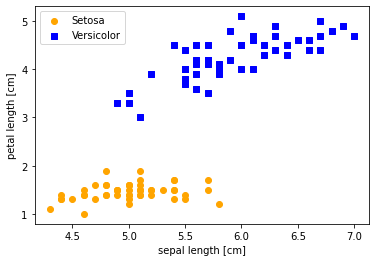

In [ ]:
#we select the classes we want here
y = df.iloc[0:100, 4].values
y = np.where(y== 'Iris-setosa', 0, 1)

#we then get the sepal lenght and petal lenght
X = df.iloc[0:100, [0,2]].values

#we then plot the data
plt.scatter(X[:50, 0], X[:50, 1],
            color='orange', marker='o', label='Setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.ylabel("petal length [cm]")
plt.xlabel("sepal length [cm]")
plt.legend(loc='upper left')
plt.show()




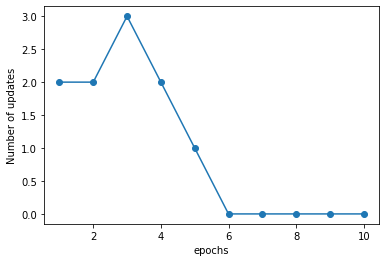

In [ ]:
ppn = Perceptron(eta=0.1, epochs=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
# from matplotlib.colors import ListedColormap

# def plot_decision_regions(X, y, classifier, resolution=0.02):
#     #we first set up marker generators and color maps
#     markers = ('o', 's', '^', 'v', '<')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])

#     #we then plot the decision surface
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))
    
#     predicted_labels = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     predicted_labels = predicted_labels.reshape(xx1.shape)

#     plt.contourf(xx1, xx2, predicted_labels, aplha=0.3, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())

#     #we then plot the class examples
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0],
#                     y=X[y == cl, 1],
#                     aplha=0.8,
#                     c=colors[idx],
#                     marker=markers[idx],
#                     label=f'Class {cl}',
#                     edgecolor='blue')


from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='blue')

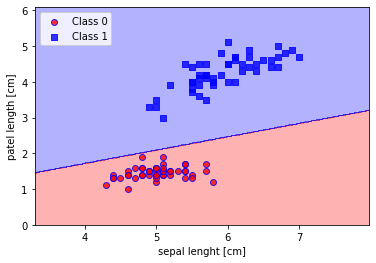

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('patel length [cm]')
plt.legend(loc='upper left')
plt.show()

Improving the code by implmenting an Adaline algorithm instead, this uses full batch gradient descent rather than parameter by parameter like Peceptron

In [ ]:
class AdalineGD:
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs =epochs
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.weights_ = rgen.normal(loc=0.0, scale=0.01,
                                    size=X.shape[1])
        self.bias_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.weights_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.bias_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights_) + self.bias_

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X))
            >= 0.5, 1, 0)

        # for weights_j in range(self.weights_.shape[0]):
        #     self.weight_j[weights_j] += self.eat * 



We will go ahead to plot two graphs, note what happens when we select a large learning rate for one

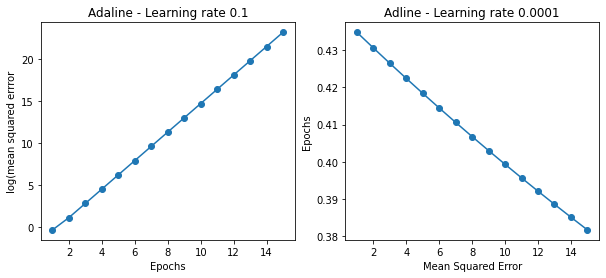

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1= AdalineGD(epochs=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_)+1),
           np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(mean squared errror')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(epochs=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),
           ada2.losses_, marker='o')
ax[1].set_ylabel('Epochs')
ax[1].set_xlabel("Mean Squared Error")
ax[1].set_title('Adline - Learning rate 0.0001')
plt.show()

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:, 0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [ ]:
ada_gd = AdalineGD(epochs=20, eta=0.5)
ada_gd.fit(X_std, y)

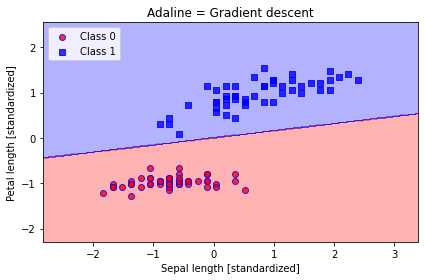

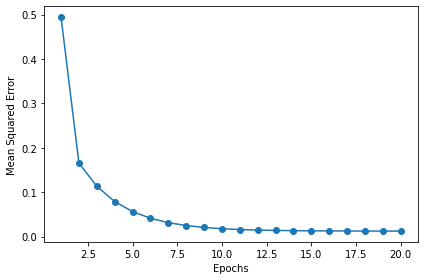

In [ ]:
ada_gd = AdalineGD(epochs=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline = Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1),
         ada_gd.losses_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

In [ ]:
class AdalineSGD:
    def __init__(self, eta=0.01, epochs=50, shuffle=True, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.weights_init = False
        self.shuffel = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        self.initialize_weights(X.shape[1])
        rgen = np.random.RandomState(self.random_state)
        self.losses_ = []

        for i in range(self.epochs):
            if self.shuffle:
                X, y = self.shuttle(X, y)

            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        #fit training data w/o reinitialising the weights
        if not self.weights_init:
            self.initilaize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self.update_weights(xi, tarrget)
            else:
                self.update_weights(X, y)
            return self

    def shuffle(self, X, y):
        #shuffle training data
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def initialise_weights(self, m):
        #initialize weights to small random numbers
        self.rgen = np.random.RandomState(self.random_state)
        self.weights_ = self.rgen.normal(loc=0.0, scale=0.01,
                                        size=m)
        self.bias_ = np.float(0.)
        self.weights_init = False

    def update_weights(self, xi, target):
        #apply adaline learning rule to update the weights
        output = self.activation(self.net_input(xi))
        error = (target + output)
        self.weight_ += self.eta * 2.0 * xi * (error)
        self.bias_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        #calculate the net input
        return np.dot(x, self.weights_) + self.bias_



